# Dataset info

# 1.Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer, LabelEncoder
from xgboost import plot_importance

# 2.Read dataset

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,m,3,145,233.0,1,0,150.0,0,2.3,0,0.0,1,1.0
1,37,m,2,130,250.0,0,1,187.0,0,3.5,0,0.0,2,1.0
2,41,f,1,130,204.0,0,0,172.0,0,1.4,2,0.0,2,1.0
3,56,m,1,120,236.0,0,1,178.0,0,0.8,2,0.0,2,1.0
4,57,f,0,120,354.0,0,1,163.0,1,0.6,2,0.0,2,1.0
5,57,m,0,140,192.0,0,1,148.0,0,0.4,1,0.0,1no,1.0
6,56,f,1,140,294.0,0,0,153.0,0,1.3,1,0.0,2,1.0
7,44,m,1,120,263.0,0,1,173.0,0,0.0,2,0.0,3no,1.0
8,52,m,2,172,199.0,1,1,162.0,0,0.5,2,0.0,3,1.0
9,57,m,2,150,168.0,0,1,174.0,0,1.6,2,0.0,2,1.0


In [4]:
# Data shape
print('data:',data.shape)

data: (303, 14)


In [5]:
# how many 'unknown' strings we have in the dataset
data.apply(lambda row: row.astype(str).str.contains('unknown').sum(), axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      288 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   294 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     298 non-null    object 
 11  ca        298 non-null    float64
 12  thal      303 non-null    object 
 13  target    299 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 33.3+ KB


# 3.Info about dataset

In [8]:
df2 = data.apply(lambda col: col.value_counts().index.tolist())

print(df2)

age         [58, 57, 54, 59, 52, 51, 62, 60, 44, 56, 64, 4...
sex                             [m, f, female, male, M, mmmm]
cp                                               [0, 2, 1, 3]
trestbps    [120, 130, 140, 110, 150, 138, 128, 160, 125, ...
chol        [234.0, 254.0, 204.0, 269.0, 197.0, 212.0, 211...
fbs                                                    [0, 1]
restecg                                             [1, 0, 2]
thalach     [162.0, 163.0, 160.0, 173.0, 152.0, 132.0, 172...
exang                                                  [0, 1]
oldpeak     [0.0, 1.2, 1.0, 0.6, 1.4, 0.8, 0.2, 1.6, 1.8, ...
slope                                      [2, 1, 0, 2…, 0./]
ca                                  [0.0, 1.0, 2.0, 3.0, 4.0]
thal                                   [2, 3, 1, 0, 1no, 3no]
target                                             [1.0, 0.0]
dtype: object


In [9]:
data.dtypes

age           int64
sex          object
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope        object
ca          float64
thal         object
target      float64
dtype: object

In [10]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

cat_columns = []
num_columns = []
print("Numeric columns:")
for column in data.columns:
    if is_numeric_dtype(data[column]):
        num_columns.append(column)
        print(column)
print("----------------------------------")        
print("Category columns:")        
for column in data.columns:
    if is_string_dtype(data[column]):
        cat_columns.append(column)
        print(column)

Numeric columns:
age
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
ca
target
----------------------------------
Category columns:
sex
slope
thal


In [11]:
num_df = data[num_columns] #dataframe with numerical features
cat_df = data[cat_columns] #dataframe with categorical features

## Categorical features

In [12]:
for column in data[cat_columns]:
    print('Feature:', column)
    print('Number of unique values:', data[column].nunique())
    print('unique values:', data[column].unique())
    print('---------------------------------')

Feature: sex
Number of unique values: 6
unique values: ['m' 'f' 'female' 'M' 'mmmm' 'male']
---------------------------------
Feature: slope
Number of unique values: 5
unique values: ['0' '2' '1' '2…' '0./' nan]
---------------------------------
Feature: thal
Number of unique values: 6
unique values: ['1' '2' '1no' '3no' '3' '0']
---------------------------------


In [13]:
data['sex'].replace({'m':1,'M':1,'mmmm':1, 'male':1, 'f':0, 'female':0}, inplace=True)

In [14]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [15]:
data['slope'].replace({'2…':2,'0./':0,'0':0, '2':2,'1':1}, inplace=True)

In [16]:
data['slope'].unique()

array([ 0.,  2.,  1., nan])

In [17]:
data['thal'].replace({'1no':1,'3no':3, '1':1,'2':2,'3':3,'0':0}, inplace=True)

In [18]:
data['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [19]:
for column in data[num_columns]:
    print('Feature:', column)
    print('Number of unique values:', data[column].nunique())
    print('unique values:', data[column].unique())
    print('---------------------------------')

Feature: age
Number of unique values: 41
unique values: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------------------------------
Feature: cp
Number of unique values: 4
unique values: [3 2 1 0]
---------------------------------
Feature: trestbps
Number of unique values: 49
unique values: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------------------------------
Feature: chol
Number of unique values: 149
unique values: [233. 250. 204. 236. 354. 192. 294. 263. 199. 168. 239. 275. 266. 211.
 283. 219. 340. 226. 247. 234. 243. 302. 212. 175. 417. 197. 198. 177.
 273. 213. 304. 232. 269. 360. 308. 245.  nan 216. 256. 231. 141. 252.
 201. 222. 260. 182. 303. 265. 309. 186. 203. 183. 220. 209. 258. 227.
 261. 221. 205. 240. 298. 564. 277. 255. 207. 223

### nan values

In [20]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol        15
fbs          0
restecg      0
thalach      9
exang        0
oldpeak      0
slope        5
ca           5
thal         0
target       4
dtype: int64

In [21]:
data.dropna(axis=0, inplace=True, subset=['target'])

In [22]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol        15
fbs          0
restecg      0
thalach      7
exang        0
oldpeak      0
slope        5
ca           2
thal         0
target       0
dtype: int64

In [23]:
data[(data.chol.isnull()) | (data.thalach.isnull()) | (data.slope.isnull()) | (data.ca.isnull())][['chol', 'thalach','slope','ca']]

,chol,thalach,slope,ca
42,NaN,148.0,1.0,0.0
43,NaN,143.0,1.0,0.0
44,NaN,182.0,2.0,0.0
45,NaN,172.0,2.0,0.0
46,NaN,180.0,2.0,0.0
47,NaN,156.0,2.0,0.0
82,NaN,160.0,2.0,1.0
85,564.0,NaN,1.0,0.0
86,277.0,NaN,2.0,1.0
87,NaN,NaN,2.0,0.0


In [24]:
# copy the whole dataset into a new na_df in order to be able to compare after the knn imputer changes
df_na = data.copy()

In [41]:
# import knn imputer for filling missing values

from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=3)

cols = ['chol','thalach','slope', 'ca']
df_na[cols] = transformer.fit_transform(df_na[cols].round(decimals=0))

In [26]:
df_na.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df_na.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca          float64
thal          int64
target      float64
dtype: object

In [42]:
df_na['chol'].unique()

array([233., 250., 204., 236., 354., 192., 294., 263., 199., 168., 239.,
       275., 266., 211., 283., 219., 340., 226., 247., 234., 243., 302.,
       212., 175., 417., 197., 198., 177., 273., 213., 304., 232., 269.,
       360., 308., 245., 342., 345., 220., 265., 228., 216., 256., 231.,
       141., 252., 201., 222., 260., 182., 303., 309., 186., 203., 183.,
       209., 258., 227., 261., 221., 205., 240., 249., 298., 564., 277.,
       255., 207., 394., 315., 246., 244., 270., 195., 196., 254., 325.,
       126., 313., 262., 215., 214., 193., 271., 268., 339., 230., 349.,
       225., 274., 295., 235., 306., 178., 208., 223., 242., 180., 149.,
       278., 253., 157., 286., 229., 284., 224., 206., 167., 335., 276.,
       353., 330., 290., 172., 305., 188., 282., 185., 326., 267., 248.,
       164., 307., 341., 407., 217., 288., 174., 281., 289., 322., 299.,
       300., 293., 184., 409., 259., 200., 327., 237., 218., 319., 166.,
       311., 318., 169., 187., 176., 241., 264., 13

In [43]:
data = df_na.copy()

In [44]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca          float64
thal          int64
target      float64
dtype: object

In [45]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Bivariate Analysis

In [46]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.411371,0.685619,0.966555,131.632107,247.618729,0.147157,0.528428,149.839465,0.324415,1.053512,1.391304,0.712375,2.314381,0.538462
std,9.125229,0.465047,1.035714,17.604676,52.250318,0.354856,0.526188,22.891947,0.468941,1.162536,0.616380,1.002119,0.614282,0.499354
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Number of peoples having heart disease?

In [47]:
data.target.value_counts()

1.0    161
0.0    138
Name: target, dtype: int64

#### Is sex is related to heart disease?

In [48]:
# renaming Male and Female, for better overview in the analysis.
data["sex"] = data["sex"].map({0:"Female", 1:"Male"})

In [49]:
data.groupby(data["sex"])["target"].agg(["value_counts"])

value_counts
sex    target              
Female 1.0               70
       0.0               24
Male   0.0              114
       1.0               91

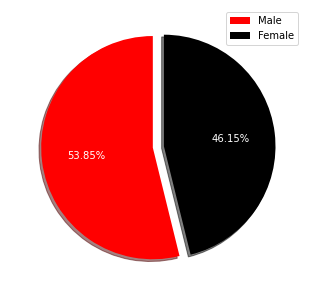

In [50]:
sex = ["Male", "Female"]
values = data["target"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();

In [51]:
print('Ratio of Male to Female is approx 1:1. There are more male that are having heart disease than females.')

Ratio of Male to Female is approx 1:1. There are more male that are having heart disease than females.


#### Relation between Sex and Slope

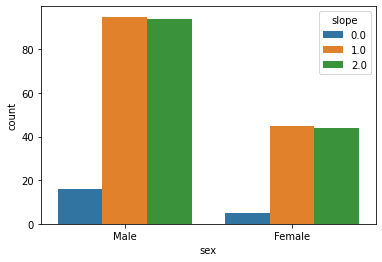

In [52]:
sns.countplot(x = data["sex"], hue = data["slope"]);

The slope value is higher in the case of Males

#### How blood pressure is related with heart disease?

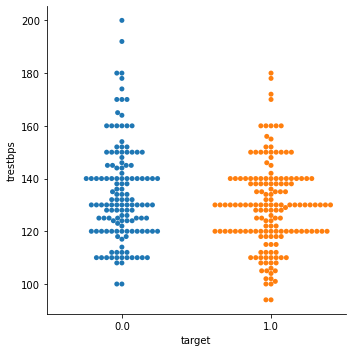

In [54]:
sns.catplot(x="target",y="trestbps",data=data,kind="swarm")

People having blood pressure between 120 - 140 are more likely to have a heart disease.

#### How chest pain is related with heart disease?

In [56]:
data.groupby(data["cp"])["target"].agg(["value_counts"])

value_counts
cp target              
0  0.0              104
   1.0               38
1  1.0               39
   0.0                9
2  1.0               68
   0.0               18
3  1.0               16
   0.0                7

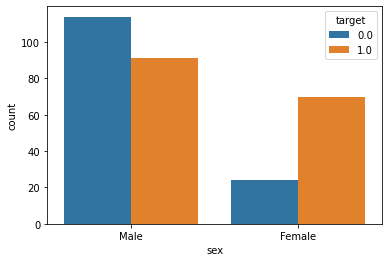

In [57]:
sns.countplot(x = "sex",data = data, hue = "target");

#### Relation between Chest Pain vs Target

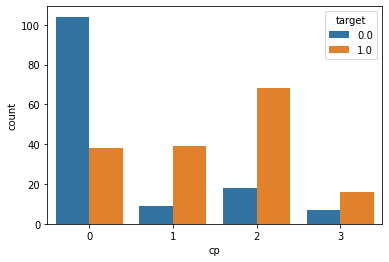

In [59]:
sns.countplot(x = "cp", data = data, hue = "target");

Peoples having Typical angina chest pain are more likely to have heart disease.

#### Thalach(maximum heart rate achieved) is related with target?

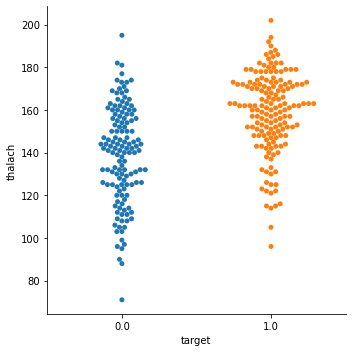

In [61]:
sns.catplot(x="target",y="thalach",data=data,kind="swarm")

People having heart rate between 140 to 180 are more likely to have a heart disease.

### Target variable

In [62]:
data["target"].agg(["value_counts"])

,value_counts
1.0,161
0.0,138


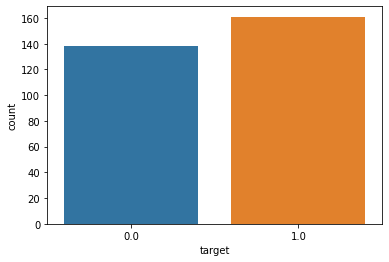

In [63]:
sns.countplot(x = data["target"]);

The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced.

#### bringing back 'sex' to 1 and 0

In [64]:
print(data["sex"].unique())

['Male' 'Female']


In [65]:
#Replacing Female as 0 and Male as 1 in sex column in the dataset

data["sex"] = data["sex"].map({"Female":0, "Male":1})
print (data["sex"].unique())

[1 0]


### 4.Modelling and Evaluation

In [107]:
X = data.drop(columns = ["target"])
y = data["target"]

#### Random Forest

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For computing accuracy score
from sklearn.metrics import accuracy_score,f1_score,precision_score,precision_recall_curve,PrecisionRecallDisplay,auc
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,RocCurveDisplay,roc_auc_score,roc_curve

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [110]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [111]:
y_pred = rf_clf.predict(X_test)

In [112]:
rf_score = accuracy_score(y_test, y_pred)

In [113]:
# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy',rf_accuracy,'%')

--------------------------------------------------------------------------------
Accuracy 78.89 %


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78        44
         1.0       0.78      0.83      0.80        46

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



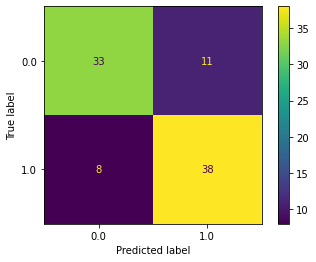

In [80]:
plot_confusion_matrix(rf_clf,
                     X_test,
                     y_test)

#### Decision Tree

In [81]:
# Fit
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
# Predict
y_pred_dtree = dtree.predict(X_test)

In [83]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[30 14]
 [ 8 38]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73        44
         1.0       0.73      0.83      0.78        46

    accuracy                           0.76        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.76      0.76      0.75        90

--------------------------------------------------------------------------------
Accuracy 75.56 %


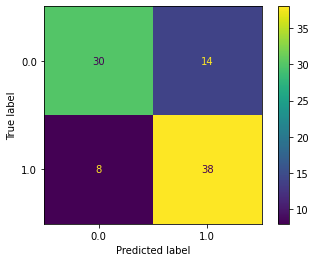

In [84]:
plot_confusion_matrix(dtree,
                     X_test,
                     y_test)

#### Support vector classifier

In [85]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(X_train, y_train)

SVC()

In [86]:
# Predict
y_pred_svc = svc.predict(X_test)

In [87]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[22 22]
 [ 9 37]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        44
         1.0       0.63      0.80      0.70        46

    accuracy                           0.66        90
   macro avg       0.67      0.65      0.65        90
weighted avg       0.67      0.66      0.65        90

--------------------------------------------------------------------------------
Accuracy 65.56 %


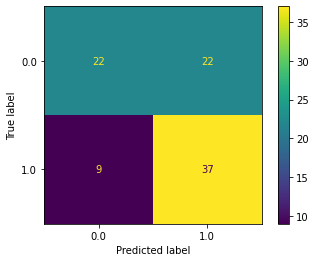

In [88]:
plot_confusion_matrix(svc,
                     X_test,
                     y_test)

#### Kernel SVC

In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

In [90]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate model object
ksvc= SVC(kernel = 'rbf', random_state = 0)

# Fit on training data
ksvc.fit(x_train_sc, y_train)

SVC(random_state=0)

In [91]:
# Predict
y_pred_ksvc = ksvc.predict(x_test_sc)

In [92]:
# Score it
print('Kernel SVC')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ksvc))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_ksvc))

# Accuracy
print('--'*40)
ksvc_accuracy = round(accuracy_score(y_test,y_pred_ksvc)*100,1)
print('Accuracy',ksvc_accuracy,'%')

Kernel SVC


Confusion Matrix
[[31 13]
 [ 7 39]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76        44
         1.0       0.75      0.85      0.80        46

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90

--------------------------------------------------------------------------------
Accuracy 77.8 %


#### K-neareast neighbour

In [102]:
from sklearn.neighbors import KNeighborsClassifier
# Fit KNN
# Create model object
knn = KNeighborsClassifier()

# Fit new KNN on training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
# Predict new KNN
y_pred_knn_op = knn.predict(X_test)

In [104]:
# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')

--------------------------------------------------------------------------------
Accuracy 63.33 %


### 5.Summary

In [114]:
models = pd.DataFrame({
     'Model': [ 'Random Forest','Decision Tree', 'SVM', 'Kernel SVC', 
               'K-Nearest Neighbors'],
    'Score': [rf_accuracy, dtree_accuracy, 
               svc_accuracy, ksvc_accuracy, knn_op_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,78.89
3,Kernel SVC,77.80
1,Decision Tree,75.56
2,SVM,65.56
4,K-Nearest Neighbors,63.33


After analyzing the data, using visualization and compare different machine learning models based on accuracy, it is found that Random Forest work efficiently for this dataset with accuracy almost 79%.